In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in all the words in dict
words = open('names.txt', 'r').read().splitlines()
words[:8]
len(words)

32033

In [3]:
#build character vocabulary and mappings from/to integers
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
#build the dataset
block_size = 3 # length of context: how many characters needed to predict the next one?
X,Y = [],[]
for w in words:
    #print(w)
    context = [0] * block_size 
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [5]:
#build the dataset
def build_dataset(words):
    block_size = 3 # length of context: how many characters needed to predict the next one?
    X,Y = [],[]
    for w in words:
        #print(w)
        context = [0] * block_size 
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] #crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words)) #80 percent length mark
n2 = int(0.9*len(words)) #90 percent length mark

Xtr, Ytr = build_dataset(words[:n1]) #training set
Xdev, Ydev = build_dataset(words[n1:n2]) #dev set
Xte, Yte = build_dataset(words[n2:]) #testing set
    

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [6]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [7]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)

In [8]:
F.one_hot(torch.tensor(5), num_classes=27).dtype

torch.int64

In [9]:
C[5]

tensor([ 0.1156,  0.8032,  0.5411, -1.1646,  0.1476, -1.0006,  0.3801,  0.4733,
        -0.9103, -0.7830])

In [10]:
W1 = torch.rand((30, 200), generator=g)
b1 = torch.rand(200, generator=g)

In [11]:
# h = torch.tanh(emb.view(-1,6) @ W1 + b1) #when inputting -1, pytorch will infer the dimmension

In [12]:
#concatenate embeddings for all inputs
# torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1).shape

In [13]:
# h

In [14]:
a = torch.arange(18)
a.shape

torch.Size([18])

In [15]:
#view will visualize this as different-sized n dimmensional tensors
#as long as total elements multiply to same, efficient using a.storage() to manipulate one dim sequence
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [16]:
#32,100 broadcasting to , 100
#Will do an element wise addition of 1 + 32, with biases added to each row
# h.shape

In [17]:
#Input is now 100, and output is 27 (27 possible next characters)
W2 = torch.randn((200,27), generator=g)
b2 = torch.rand(27, generator=g) #also 27 outputs for bias

In [18]:
#exponential logits to get fake counts to then get probability
# counts = logits.exp()
# prob = counts/ counts.sum(1, keepdim=True)
# #for negative log likelihood loss, take log and mean of probabilities
# loss = -prob[torch.arange(22814), Y].log().mean()
# loss

In [19]:
#How do we actually see the letter that comes next?
#Index into the rows of prob, each row pluck out probability assigned to correct char
# prob[torch.arange(32), Y]
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)

11897

In [20]:
for p in parameters:
    p.requires_grad=True

In [21]:
learning_rate_exponent = torch.linspace(-3,0,1000)
lrs = 10**learning_rate_exponent #create learning rates between -0.001 and -1
lrs #exponentially stepped between these rates, rather than linearly

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [22]:
lri = []
lossi = [] 
stepi = []

In [60]:
#keep track of learning rate and losses
for i in range(100000):

    #construct mini batch
    ix = torch.randint(0, Xtr.shape[0], (32,)) # we use this to index into X anx Y
    #forward pass of nueral net
    emb = C[Xtr[ix]] # (32,3,2)
    hidden = torch.tanh(emb.view(-1,30) @ W1+b1) #(32,100)
    logits = hidden @ W2 + b2 #you can offset logits by any arbitrary number you want
    loss = F.cross_entropy(logits,Ytr[ix])
    #backward pass
    #set gradients to zero
    for p in parameters:
        p.grad = None
    loss.backward()
    #updateb
    # lr = lrs[i]
    lr = 0.01 if i < 100000 else 0.01 #learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    #track lr statistics
    # lri.append(learning_rate_exponent[i])
    lossi.append(loss.log10().item()) #plot loss less rather than loss
    stepi.append(i)
print(loss.item())

2.2628889083862305


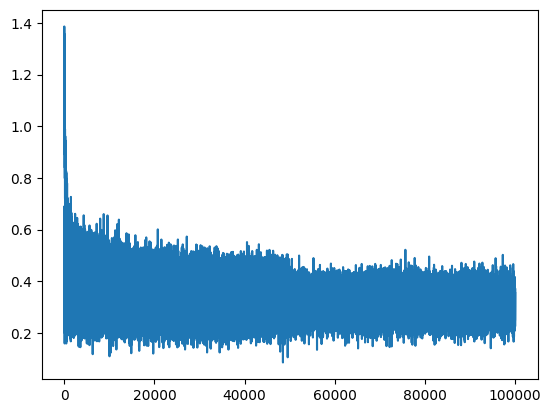

In [61]:
plt.plot(stepi,lossi)

In [62]:
#Plot Learning Rates vs Loss
#plt.plot(lri,lossi) 
#we can deduce from this plot that a good lre of -1.5 and -0.5

In [63]:
#In practice, we will perform these forward/backward passes on many batches of the data
#randomly select random mini batch of data, forward/backward pass and update, then iterate on those batches
torch.randint(0,X.shape[0],(32,)) #integers that index into 
#more efficient to take more approximate gradient and do more batches then take one overall gradient

tensor([ 79227,  99501,  86313, 194116,  70844, 183419, 131479,  48877,  68510,
         61842,  74739,  59726, 222036, 192264, 171973,  93063, 144744,  76165,
        121687, 121661, 111424, 128640, 150691,  78517,  25501, 101400, 206928,
        177622, 133382,  98045, 137228,  48626])

In [64]:
    emb = C[Xdev] # (32,3,2)
    hidden = torch.tanh(emb.view(-1,30) @ W1+b1) #(32,100)
    logits = hidden @ W2 + b2 #you can offset logits by any arbitrary number you want
    loss = F.cross_entropy(logits,Ydev)
    loss

tensor(2.1621, grad_fn=<NllLossBackward0>)

In [65]:
#How do we gain confidence in our learning rate?
#First we find learning rate by plotting learning rates and losses
#We then decay the learning rate by a factor of 10 at the end of training

In [66]:
#If we use all data in one training set, we will most likely overfit to the data
#Split up into training split (80%), dev/validation split (10%), test split (10%)
#The dev split is used to tune hyperparameters, test split used to evaluate performance of model at end

In [67]:
emb = C[Xtr] # (32,3,2)
hidden = torch.tanh(emb.view(-1,30) @ W1+b1) #(32,100)
logits = hidden @ W2 + b2 #you can offset logits by any arbitrary number you want
loss = F.cross_entropy(logits,Ytr)
loss

tensor(2.1249, grad_fn=<NllLossBackward0>)

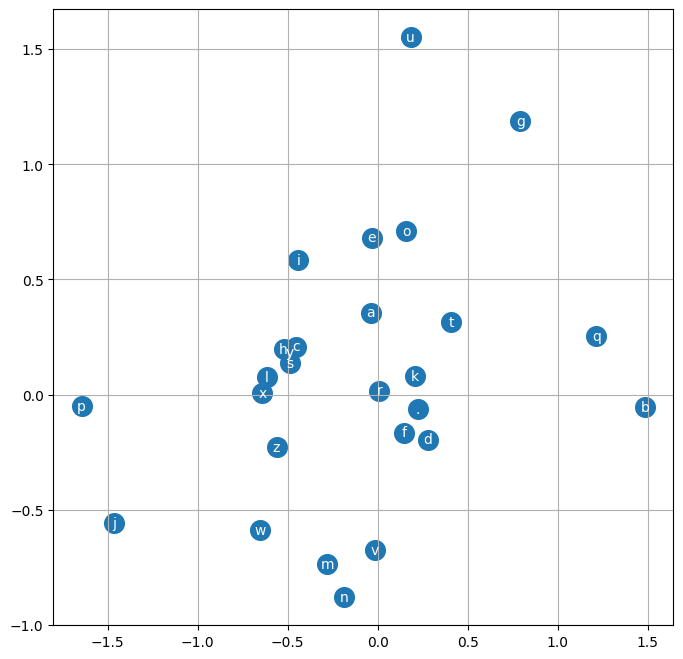

In [68]:
#Small batch_size leads to bottleneck
#Visualize embedding vectors for characters before scaling up
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')